In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

IsAlert


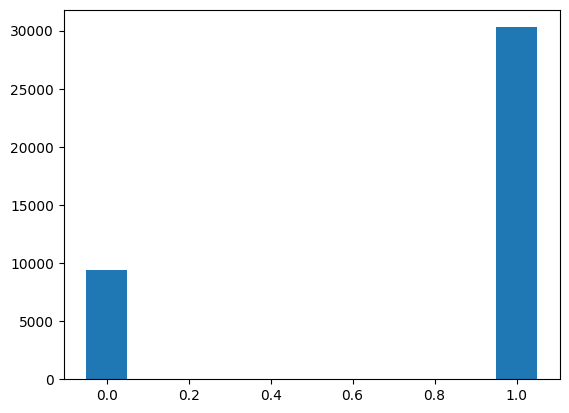

P1


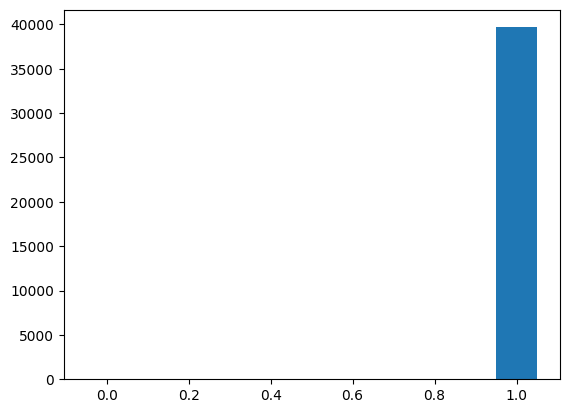

P2


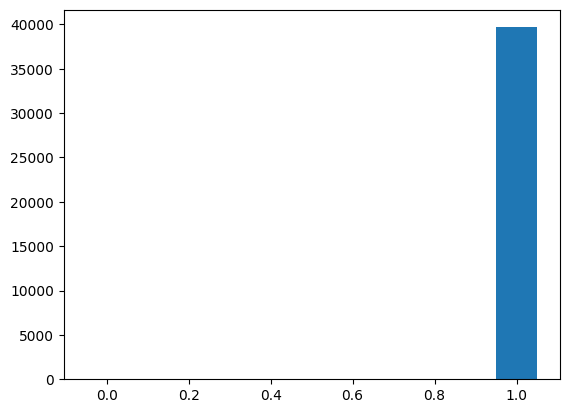

P3


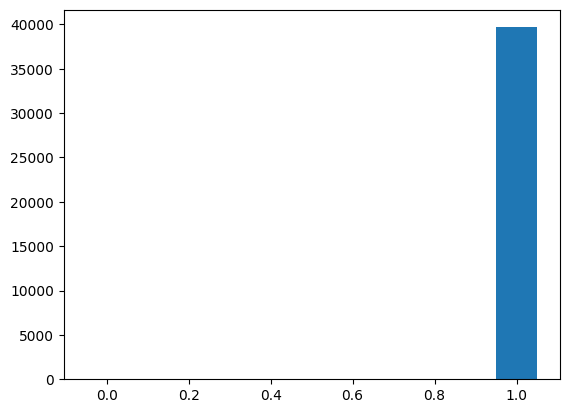

P4


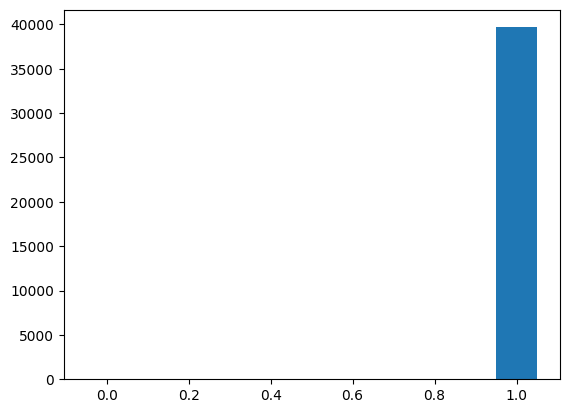

P5


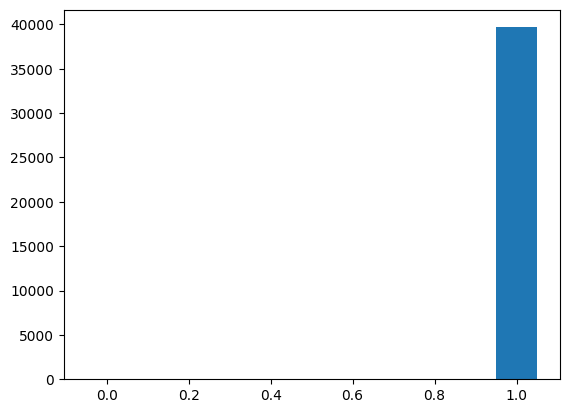

P6


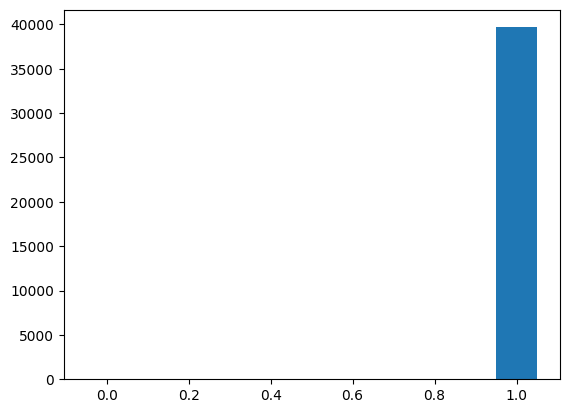

P7


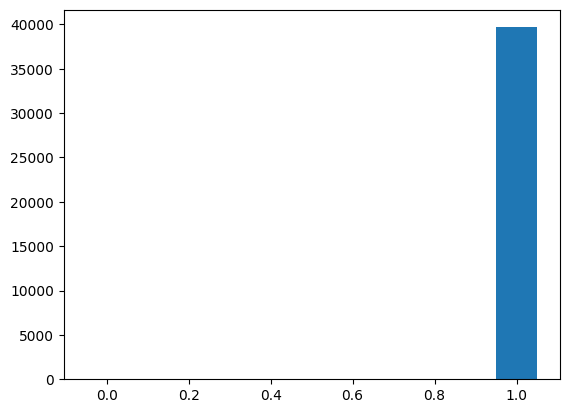

E1


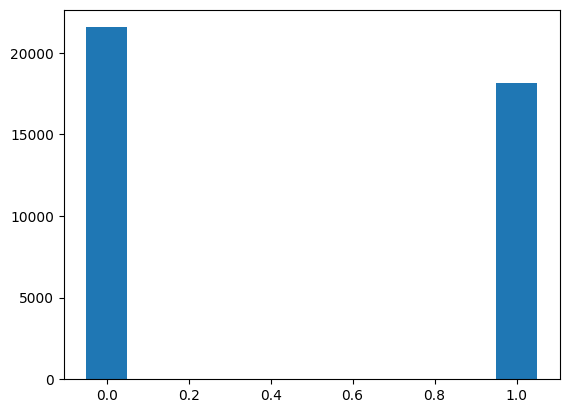

E2


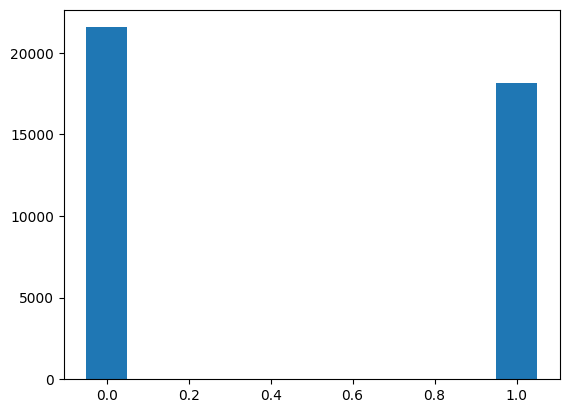

E3


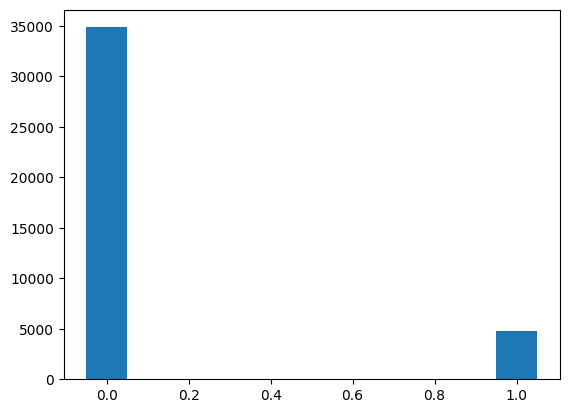

E4


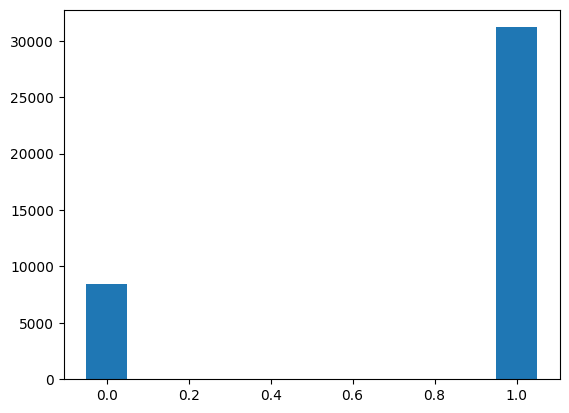

E5


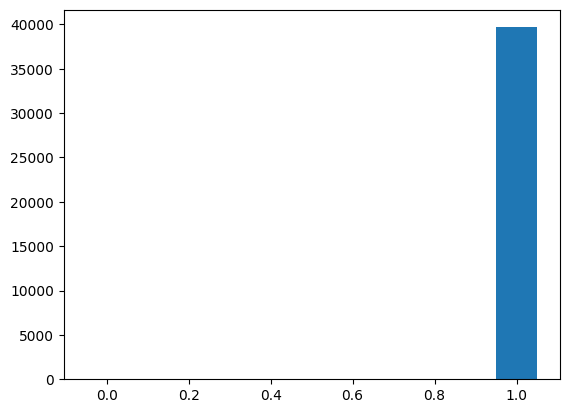

E6


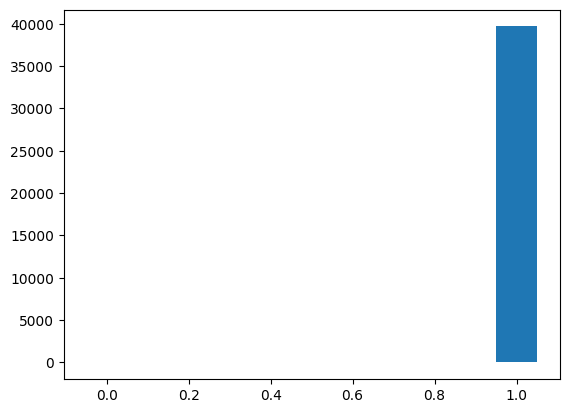

E7


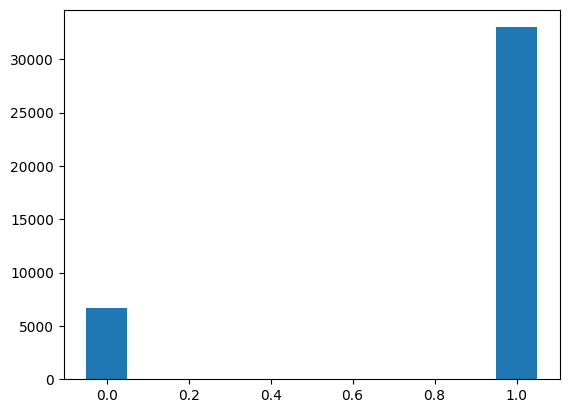

E8


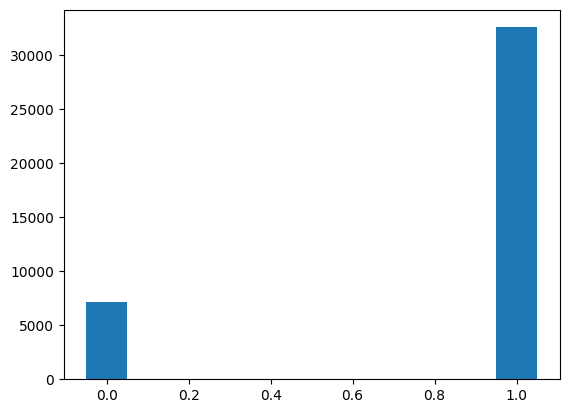

E9


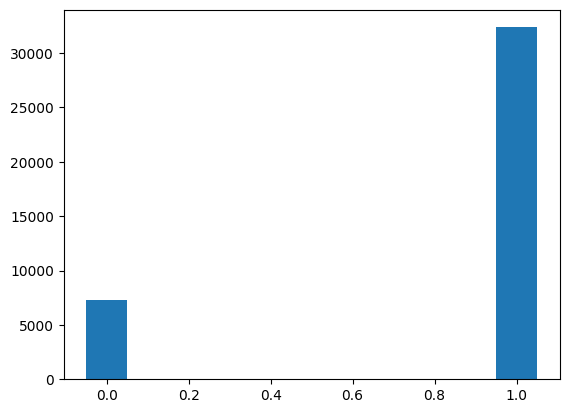

E10


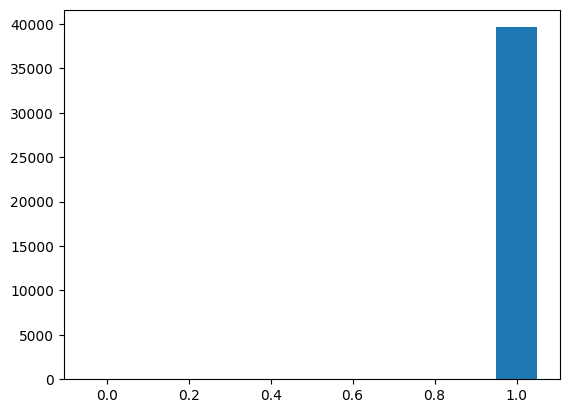

E11


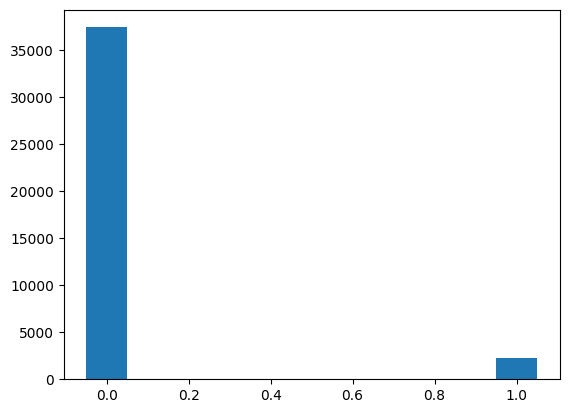

V1


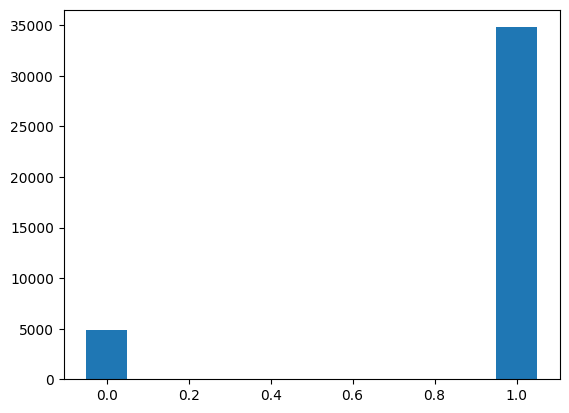

V2


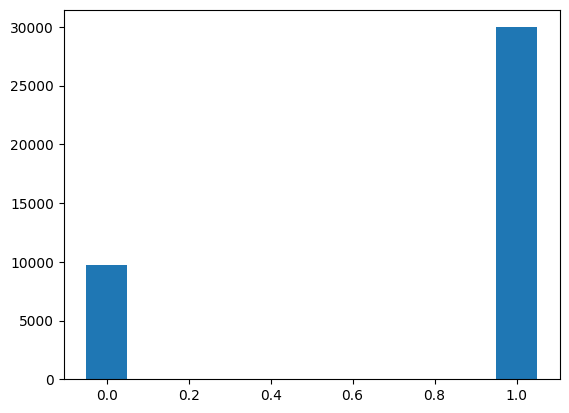

V3


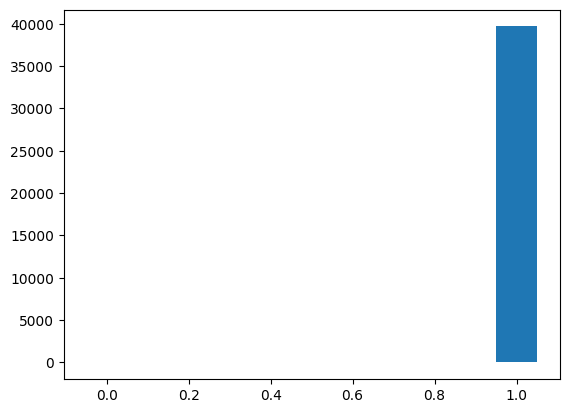

V4


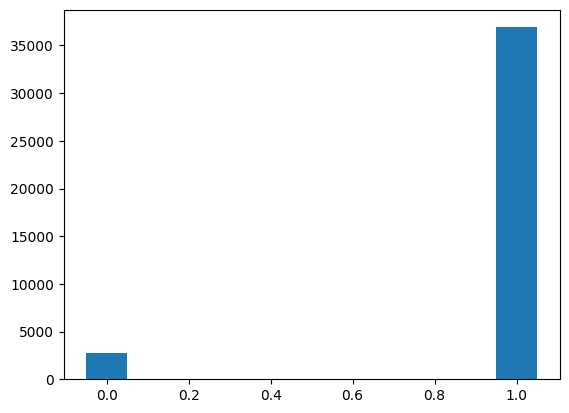

V5


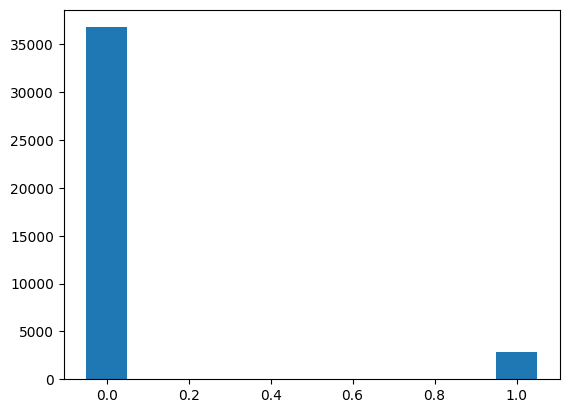

V6


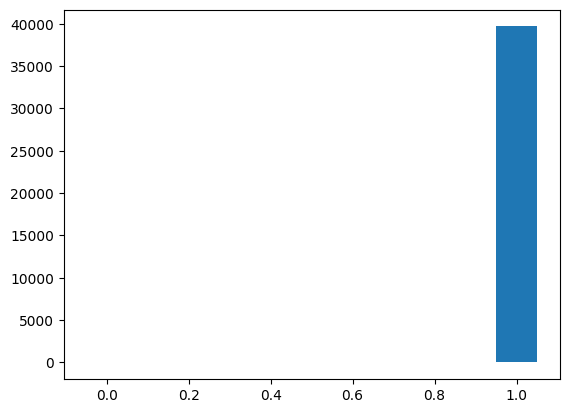

V7


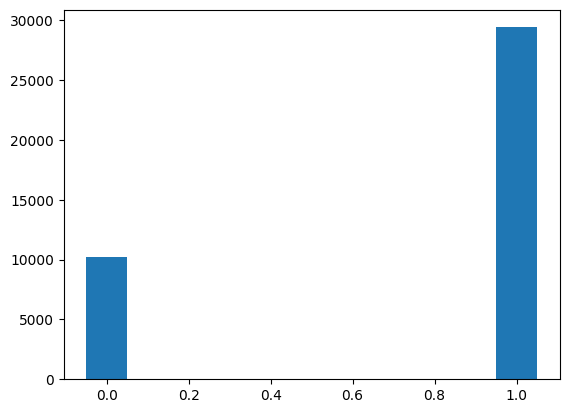

V8


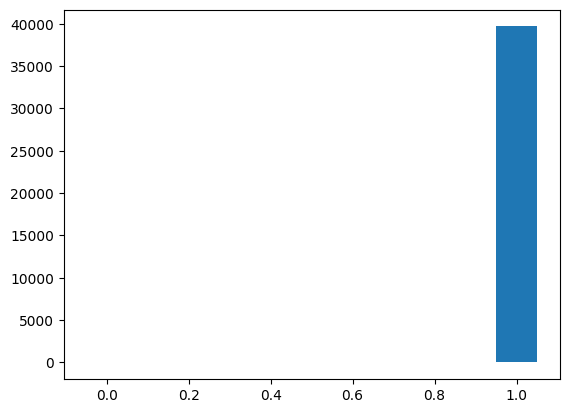

V9


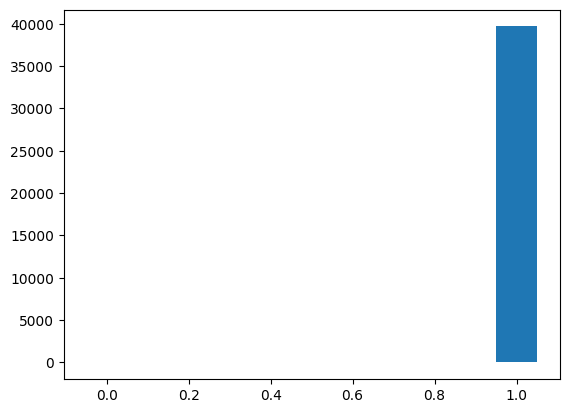

In [ ]:
# checking feature balance
raw_data = pd.read_csv('data.csv')
for i in raw_data.columns:
    x = raw_data[i]
    plt.bar([0,1], [raw_data[i].count() - raw_data[i].astype(bool).sum(axis=0),raw_data[i].astype(bool).sum(axis=0)],width=0.1)
    print(i)
    plt.show()

In [ ]:
raw_data.replace([999, -999], inplace=True)
raw_data.fillna(99, inplace=True)

In [ ]:
# droping columns where most of the values are zeros
raw_data.drop(['E3', 'E11', 'V5'], axis=1)

,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,E9,E10,V1,V2,V3,V4,V6,V7,V8,V9
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0.000,0.000,...,1.0,57.0,101.96,0.175,752.0,5.99375,2005.0,13.4,4.0,14.8004
1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0.000,0.000,...,1.0,57.0,101.98,0.455,752.0,5.99375,2007.0,13.4,4.0,14.7729
2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1.0,57.0,101.97,0.280,752.0,5.99375,2011.0,13.4,4.0,14.7736
3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1.0,57.0,101.99,0.070,752.0,5.99375,2015.0,13.4,4.0,14.7667
4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0.000,0.000,...,1.0,57.0,102.07,0.175,752.0,5.99375,2017.0,13.4,4.0,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39670,1,47.0295,12.31150,1116,53.7634,0.106381,680,88.2353,0.000,0.000,...,1.0,76.0,114.27,0.455,752.0,7.48125,2225.0,0.0,4.0,17.6841
39671,1,46.7576,10.84960,1116,53.7634,0.106381,680,88.2353,0.000,0.000,...,1.0,76.0,114.08,0.455,752.0,7.48125,2222.0,0.0,4.0,17.6671
39672,1,46.4937,18.16600,1116,53.7634,0.106381,672,89.2857,0.000,0.000,...,1.0,76.0,113.95,0.385,752.0,7.48125,2216.0,0.0,4.0,17.6580
39673,1,46.1297,10.26300,1116,53.7634,0.106381,672,89.2857,0.000,0.000,...,1.0,76.0,114.06,0.455,752.0,7.48125,2223.0,0.0,4.0,17.6288


In [ ]:
# splitting into training and testing
X = raw_data.iloc[:,1::]
Y = raw_data.iloc[:,0]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [ ]:
# feature scaling/Normalization of training and testing data

col_list = ['P1', 'P2', 'P3', 'P4', 'P6', 'P7',
            'E1', 'E2', 'E3', 'E4','E6', 'E7', 'E8', 'E10', 'E11',
            'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9']

for i in col_list:
    Xtrain[i] = (Xtrain[i] - Xtrain[i].mean())/(Xtrain[i].max() - Xtrain[i].min())

for i in col_list:
    Xtest[i] = (Xtest[i] - Xtest[i].mean())/(Xtest[i].max() - Xtest[i].min())


In [ ]:
# Logistic Regression
lr = LogisticRegression(C=0.5)
lr.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
lr.score(Xtrain, ytrain)

# Testing Accuracy
ypred = lr.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.9437933207309389
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1964
           1       0.93      1.00      0.96      5971

    accuracy                           0.94      7935
   macro avg       0.96      0.89      0.92      7935
weighted avg       0.95      0.94      0.94      7935



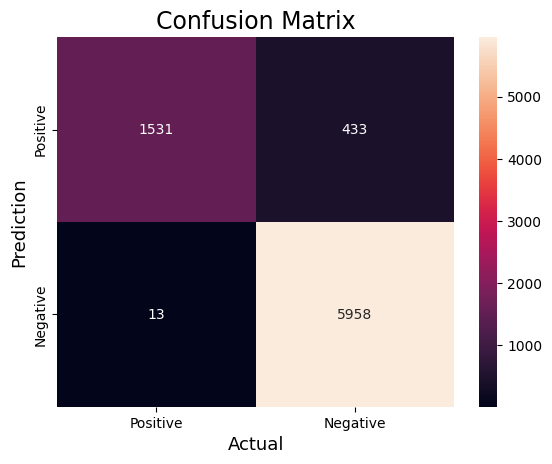

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

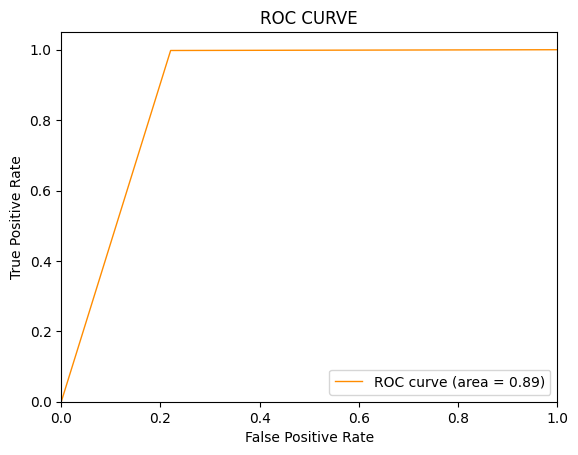

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# BernoulliNB
bnb = BernoulliNB()
bnb.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
bnb.score(Xtrain, ytrain)

# Testing Accuracy
ypred = bnb.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.9439193446754883
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1964
           1       0.93      1.00      0.96      5971

    accuracy                           0.94      7935
   macro avg       0.96      0.89      0.92      7935
weighted avg       0.95      0.94      0.94      7935



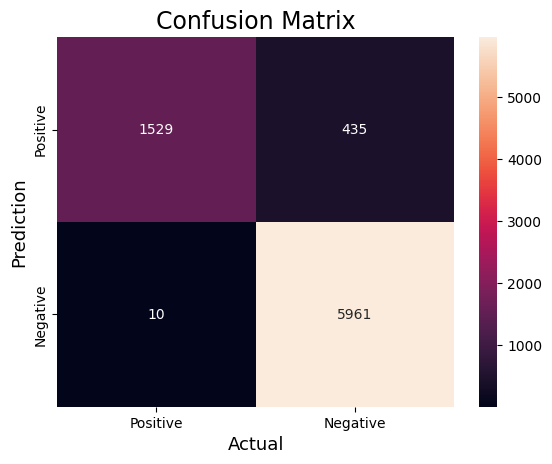

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

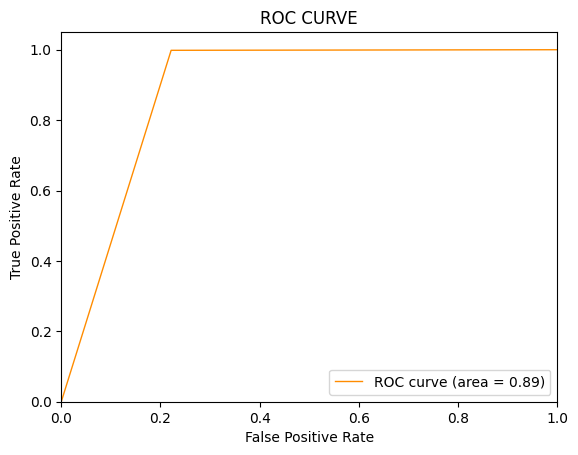

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Random Forests
rfc = RandomForestClassifier()
rfc.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
rfc.score(Xtrain, ytrain)

# Testing Accurcy
ypred = rfc.predict(Xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.9546313799621928
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1964
           1       0.94      1.00      0.97      5971

    accuracy                           0.95      7935
   macro avg       0.97      0.91      0.93      7935
weighted avg       0.96      0.95      0.95      7935



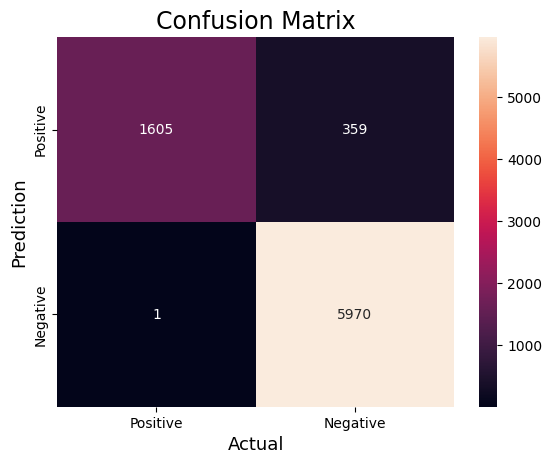

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

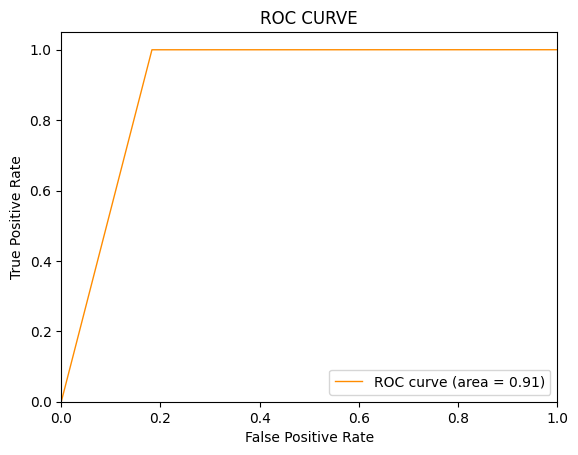

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
svm = SVC()
svm.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
svm.score(Xtrain, ytrain)

# Testing Accurcy
ypred = svm.predict(Xtest)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.945179584120983
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1964
           1       0.93      1.00      0.96      5971

    accuracy                           0.95      7935
   macro avg       0.97      0.89      0.92      7935
weighted avg       0.95      0.95      0.94      7935



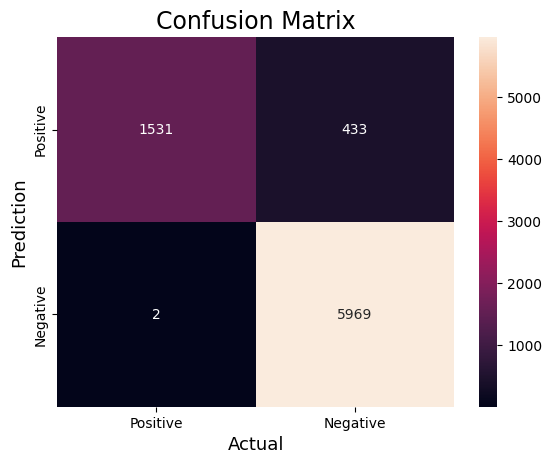

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

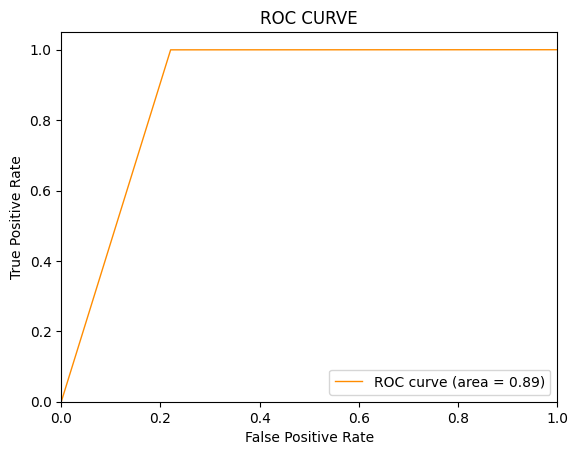

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain,ytrain.values.ravel())

# Training Accuracy
lda.score(Xtrain, ytrain)

# Testing Accurcy
ypred = lda.predict(Xtest)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.9105229993698802
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1964
           1       0.92      0.96      0.94      5971

    accuracy                           0.91      7935
   macro avg       0.90      0.86      0.87      7935
weighted avg       0.91      0.91      0.91      7935



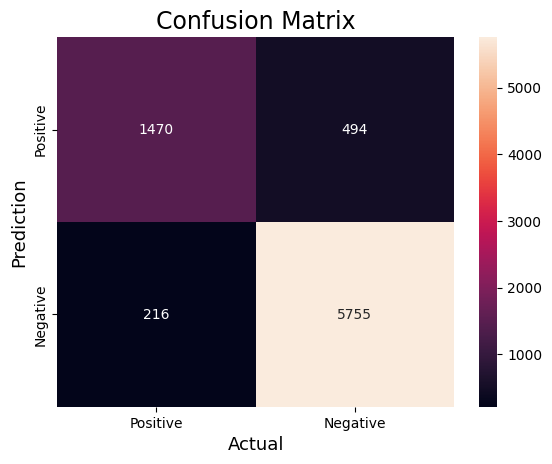

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

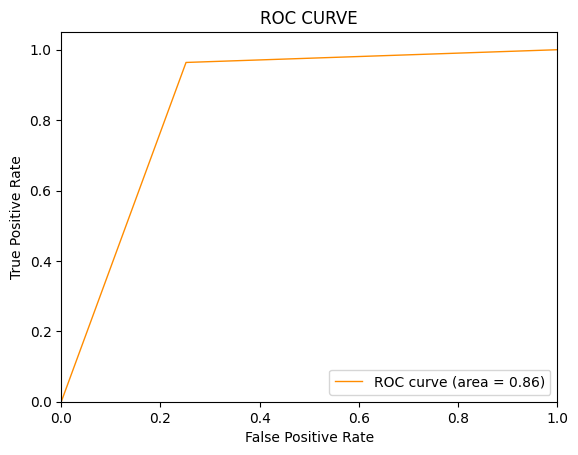

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,ytrain.values.ravel())
knn.score(Xtrain, ytrain)

# Testing Accurcy
ypred = knn.predict(Xtest)
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.9463137996219282
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1964
           1       0.94      0.99      0.97      5971

    accuracy                           0.95      7935
   macro avg       0.95      0.90      0.92      7935
weighted avg       0.95      0.95      0.94      7935



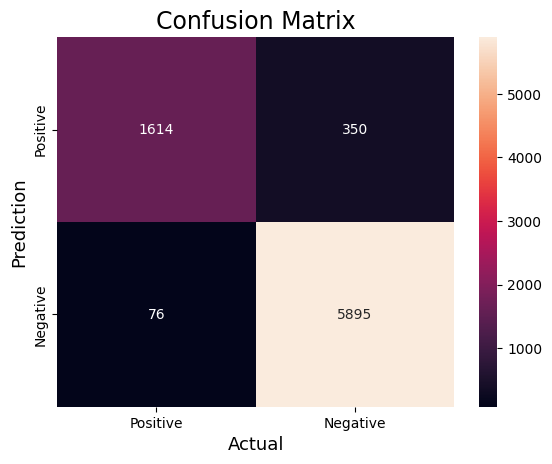

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

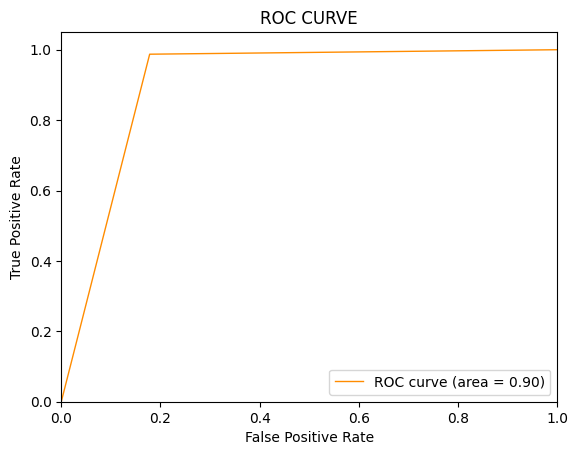

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()